<a href="https://colab.research.google.com/github/AnasAlyan/Telco-Customer-Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
**This data in** : https://www.kaggle.com/blastchar/telco-customer-churn

**Content :**

Each row represents a customer , each column contains customer's attributes described on the column Metadata



**The data set includes information about :**

- Customers who left within the last month (the column is called Churn)
- Services that each customer has signed up for : phone, multiple lines, internet, online bachup, device protection, tech support, and streaming TV and movies
- Customer Account Information : how long they've been a customer, contract, payment method, paperless billing , monthly charges, and total charges

- Demographic info about customers : gender, age range, and if they have partners and dependents
  

# **We want to answer some questions sush as :**
**What kind of people left within the last month ?**

**What is the reason for lefting the company within the last month ?**


## Data Wrangling
**let's read the data and take some intuition about it**


In [1]:
# import the important libraries :
# for dataframe :
import pandas as pd     
# for arraies :
import numpy as np
# for visualization :
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
telco = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telco['TotalCharges'] = telco['TotalCharges'].replace(" ", np.nan)

In [6]:
# Numer of missing values for each columns :
telco.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
telco.dropna(axis=0,inplace=True)

In [8]:
# Converting type of TotalCharges to float :
telco['TotalCharges'] = telco['TotalCharges'].astype(float)
type(telco['TotalCharges'])

pandas.core.series.Series

**we can see that the data don't have missing value**




In [9]:
# to Know some statistical information about the numerical data :
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
telco.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [11]:
telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
telco.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

# Now we can say about this data :
- **we have 2 genders of clients, Some clients are still dependent, other are independent and some have a partner.**

- **Customers who have available phone service have some features and advantages**

- **The company also pronides 4 payment methodes :**

  1) Electronic check

 2) Mailed check

 3) Bank transfer (automatic)

 4)  Credit card (automatic)


# Exploratory Data Analysis
**now let's make Exploratory Data Analysis**

In [13]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# What is the percentage for each gender which left the company ?




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


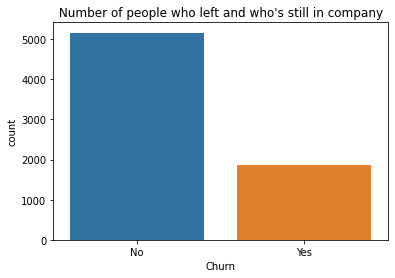

In [14]:
sns.countplot(telco.Churn)
plt.title(" Number of people who left and who's still in company " )
plt.show()

In [15]:
telco.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


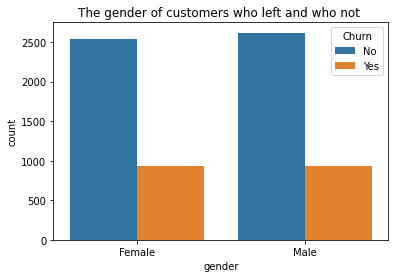

In [16]:
sns.countplot(telco.gender, hue = telco.Churn)
plt.title('The gender of customers who left and who not ')
plt.show()

In [17]:
female_left = telco.query('gender =="Female" and Churn == "Yes"')

In [18]:
female_left.shape

(939, 21)

In [19]:
male_left = telco.query('gender == "Male" and Churn == "Yes"')

In [20]:
male_left.shape

(930, 21)

In [21]:
print('The percentage of female who left is {}%'.format((939/1869)*100))

The percentage of female who left is 50.24077046548957%


In [22]:
print('The percentage od male who left is {}%'.format((930/1869)*100))

The percentage od male who left is 49.75922953451043%


**We can say that : The gender almost didn't affect on Churn**

# Let's think about outher kind of people

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


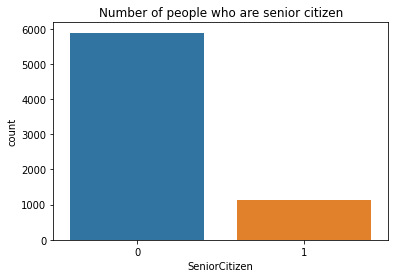

In [23]:
sns.countplot(telco.SeniorCitizen)
plt.title('Number of people who are senior citizen')
plt.show()

In [24]:
telco.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


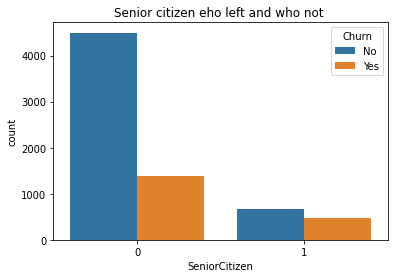

In [25]:
sns.countplot(telco.SeniorCitizen,hue = telco.Churn)
plt.title('Senior citizen eho left and who not ')
plt.show()

In [26]:
senior_left = telco.query('SeniorCitizen == 1 and Churn == "Yes"')

In [27]:
senior_left.shape

(476, 21)

In [28]:
print('The percentage of senior citizen who left is {}%'.format((476/1142)*100))

The percentage of senior citizen who left is 41.68126094570928%


#there is a problem!
**41.7% from senior citizen left the company, which it mean that the company didn't provide a suitable service to them**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


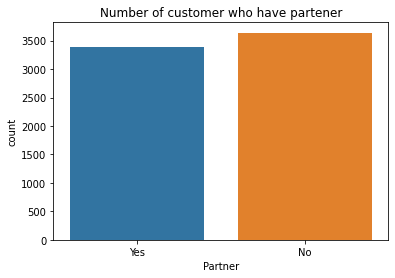

In [29]:
sns.countplot(telco.Partner)
plt.title('Number of customer who have partener')
plt.show()

In [30]:
telco.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


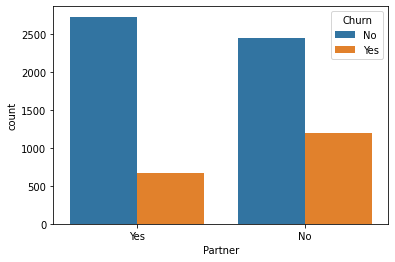

In [31]:
sns.countplot(telco.Partner,hue = telco.Churn)
plt.show()

In [32]:
partner_left = telco.query("Partner == 'Yes' and Churn == 'Yes'")

In [33]:
partner_left.shape

(669, 21)

In [34]:
telco.query("Partner == 'No' and Churn == 'Yes'").shape

(1200, 21)

In [35]:
print('There are {}% of customers who have partner left the company '.format((669/3402)*100))
print("There are {}% of customers who didn't have partner left ".format((1200/3641)*100))

There are 19.66490299823633% of customers who have partner left the company 
There are 32.95797857731392% of customers who didn't have partner left 


# There is another problem : 33% of customers who don't have partner left the company
**which it mean that : the company didn't provide a suitable service to them**

# let's discover the last kind of customer who is dependant and who is not

In [36]:
telco.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


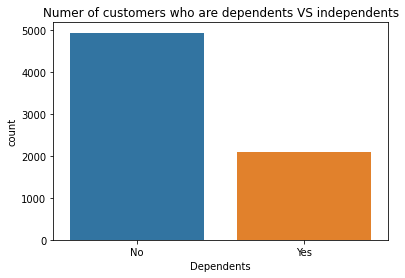

In [37]:
sns.countplot(telco.Dependents)
plt.title('Numer of customers who are dependents VS independents')
plt.show()

**let's see who are left the company**

In [38]:
telco.query("Dependents == 'Yes' and Churn == 'Yes'").shape

(326, 21)

In [39]:
telco.query("Dependents == 'No' and Churn == 'Yes'").shape


(1543, 21)

In [41]:
print("There are {}% of customers who are Dependents left the company \n and there are {}% of customers who are independents left"
     .format((326/2110)*100,(1543/4933)*100))

There are 15.450236966824646% of customers who are Dependents left the company 
 and there are 31.279140482465028% of customers who are independents left


**That is expected thing, the number of independents customers who left the company is 31% which is greater than the number of dependent customer who left the company which is 15.4%, because they want to save money**


**now we are put our hand on some problems which are :**

- 41.7% from senior citizen left the company.
- 33% of customers who don't have partner left the company.
- 31% of independent customers left the company
















# It's time to finde the reasons for those problems

In [42]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


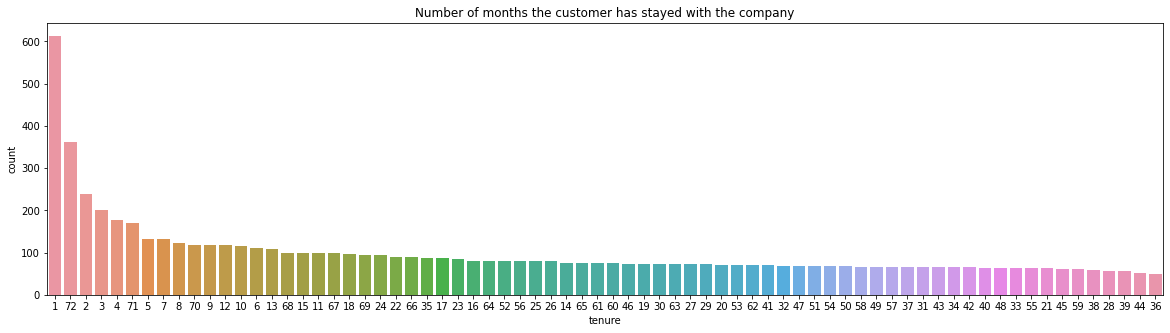

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(telco.tenure,order=(telco.tenure.value_counts().index))
plt.title('Number of months the customer has stayed with the company')
plt.show()

In [44]:
print(' There are {}% of customers left the company after the first month'.format((telco.query("tenure == 1").shape[0]/telco.shape[0])*100))

 There are 8.717292377701934% of customers left the company after the first month


In [45]:
print('In general {}% of customers left the company after first 5 months '.format((telco.query("tenure == [1,2,3,4,5]").shape[0]/telco.shape[0])*100))

In general 19.340159271899886% of customers left the company after first 5 months 


**Select numerical features**

In [46]:
num_col = telco[['tenure','MonthlyCharges','TotalCharges']]

In [47]:
num_col.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


# Visualization

In [48]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
telco.shape

(7032, 21)

**What is the structure of your dataset ?**

The data have 7032 rows and 21 columns



**What is?are the main feature(s) of interest in your dataset ?**


*   gender
*  SeniorCitizen
*  Partner
*  Dependents
*  tenure
*  PhoneService
*  MultipleLines
*  InternetService
*  OnlineSecurity
*  OnlineBackup
*  DeviceProtection
*  TechSupport
*  StreamingTV
*  StreamingMovies
*  Contract
*  PaperlessBilling
*  PaymentMethod
*  MonthlyCharges
*  TotalCharges
*  Churn





**What features in the dataset do you think will help support your investigation into your features of intersest ?**

Untill now I fell all feature will help me 

# Univariate Exploration 

In [50]:
df = telco.drop('customerID',axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Profiling our clients**

In [51]:
def pie(x):
  sorted_counts = df[x].value_counts()
  plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90,
          counterclock = False, autopct = '%.1f%%',shadow = True);
  plt.axis('square')
  plt.show()        

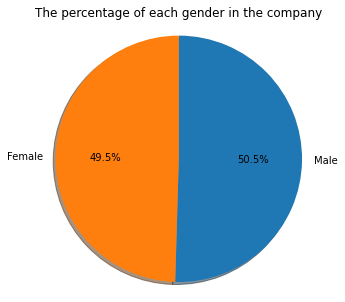

In [52]:
plt.figure(figsize=(5,5))
plt.title('The percentage of each gender in the company')
pie('gender')
plt.show()

**The Company has an approximated equal number of gender**

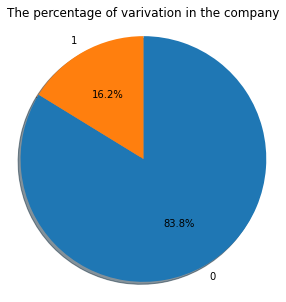

In [53]:
plt.figure(figsize=(5,5))
plt.title('The percentage of varivation in the company')
pie('SeniorCitizen')
plt.show()

**16.2% of the company's clients are elderly and the the rest are young**

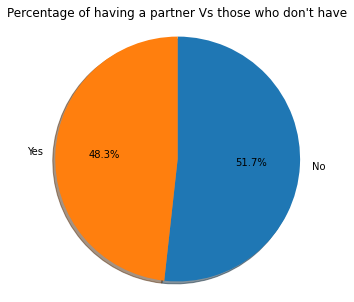

In [54]:
plt.figure(figsize=(5,5))
plt.title("Percentage of having a partner Vs those who don't have")
pie('Partner')
plt.show()

**51.7% of clients don't have a partner**

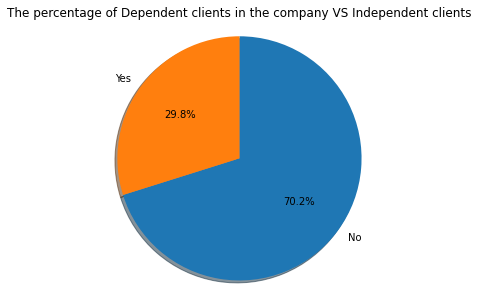

In [55]:
plt.figure(figsize=(5,5))
plt.title('The percentage of Dependent clients in the company VS Independent clients')
pie('Dependents')
plt.show()

**We can see 70.2% of clints are Independent**

In [56]:
num_col.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


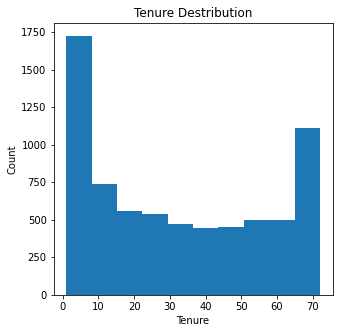

In [57]:
plt.figure(figsize =(5,5))
plt.hist(num_col.tenure)
plt.title('Tenure Destribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

**We can't gain information from this values so I will try to count the logarithm to it and make a distribution again**

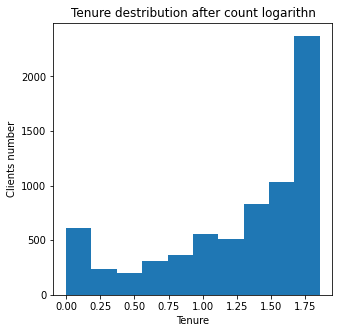

In [58]:
plt.figure(figsize=(5,5))
plt.hist(np.log10(num_col.tenure)) # Here I count the logarithm 10 for the tenure feature
plt.title('Tenure destribution after count logarithn')
plt.xlabel('Tenure')
plt.ylabel('Clients number')
plt.show()

**We can see now that the longer the tenure , the greater the numer of clients**

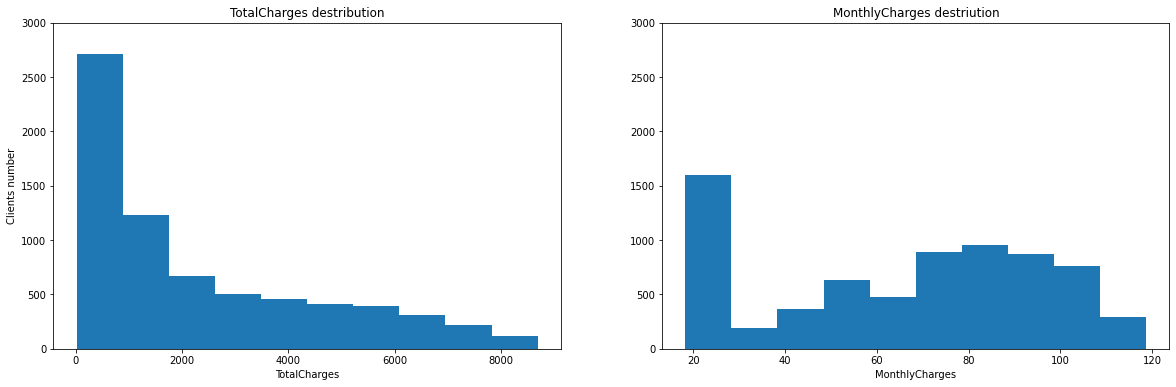

In [59]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.hist(num_col.TotalCharges)
plt.ylim(0,3000)
plt.title('TotalCharges destribution')
plt.xlabel('TotalCharges')
plt.ylabel('Clients number')

plt.subplot(1,2,2)
plt.hist(num_col.MonthlyCharges)
plt.ylim(0,3000)
plt.title('MonthlyCharges destriution')
plt.xlabel('MonthlyCharges')
plt.show()

**For Total Charges:**

- the largest number of customers pays a value between 0 and 2000, after which the number of clients decreases dramatically

**For Monthly Charges:**

- There is a varation in the number of customers , but it increases between 20 and 25

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


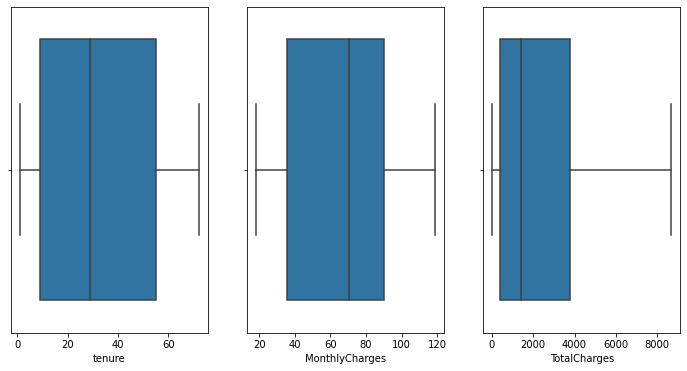

In [60]:
plt.figure(figsize=(12,6))

for i in range(len(list(num_col.columns))):
  plt.subplot(1,3,i+1)
  sns.boxplot(num_col.iloc[:,i])

**There are no outliers**

**Discuss the distribution(s) of your variabe(s) of interest. Were there any unusual points ? Did you need to perform any transformations ?**

- for the tenure feature the distribution was not good to observe smething so I calculate the logarithm to see the distribution accuately


# Bivariate Exploration

In [61]:
service = telco.iloc[:,6:-4]

In [62]:
service.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

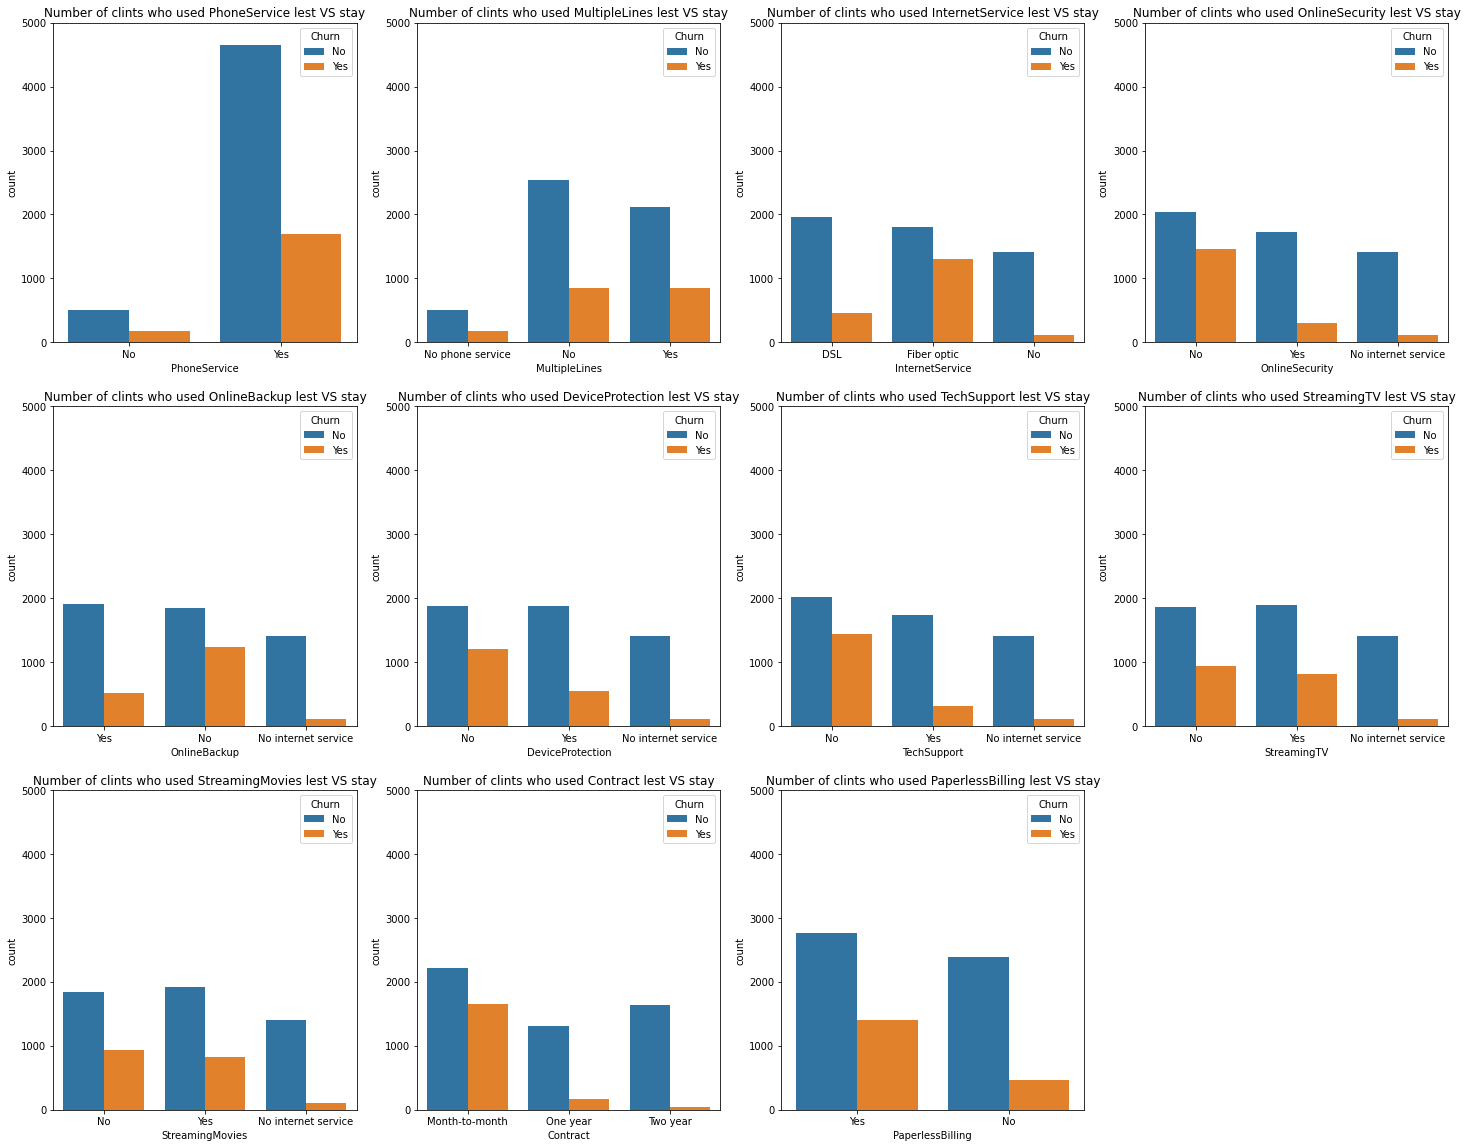

In [63]:
plt.figure(figsize=(25,20))
for i, feature in enumerate(list(service.columns)):
  plt.subplot(3,4,i+1)
  sns.countplot(feature,hue = telco.Churn,data=telco)
  plt.ylim(0,5000)
  plt.title('Number of clints who used {} lest VS stay'.format(feature))
plt.show()

**The previous graph shows the relationship of leaving the company with services, and knowing the number of those who left the company and who remained in relation to using the services**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

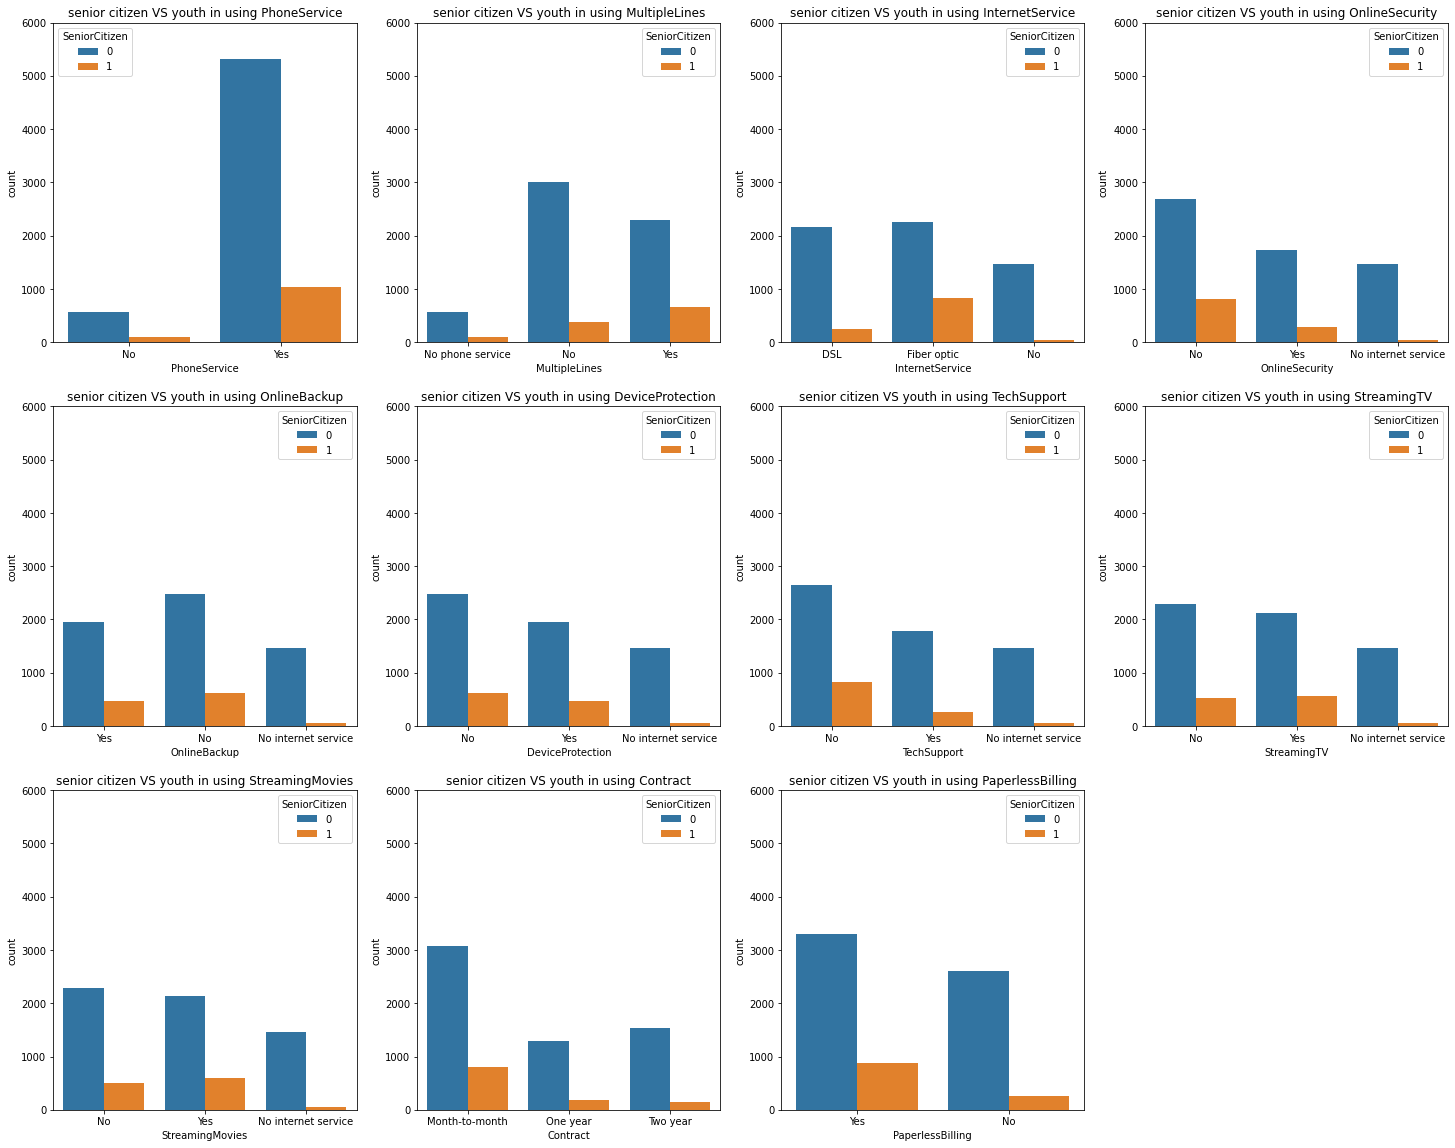

In [64]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
  plt.subplot(3,4,i+1)
  sns.countplot(feature,hue = telco.SeniorCitizen,data = telco)
  plt.ylim(0,6000)
  plt.title('senior citizen VS youth in using {}'.format(feature))
plt.show()

**The pervious plot aims to find out the number of elderly people who use different services and the number of young people who use the same services as well**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

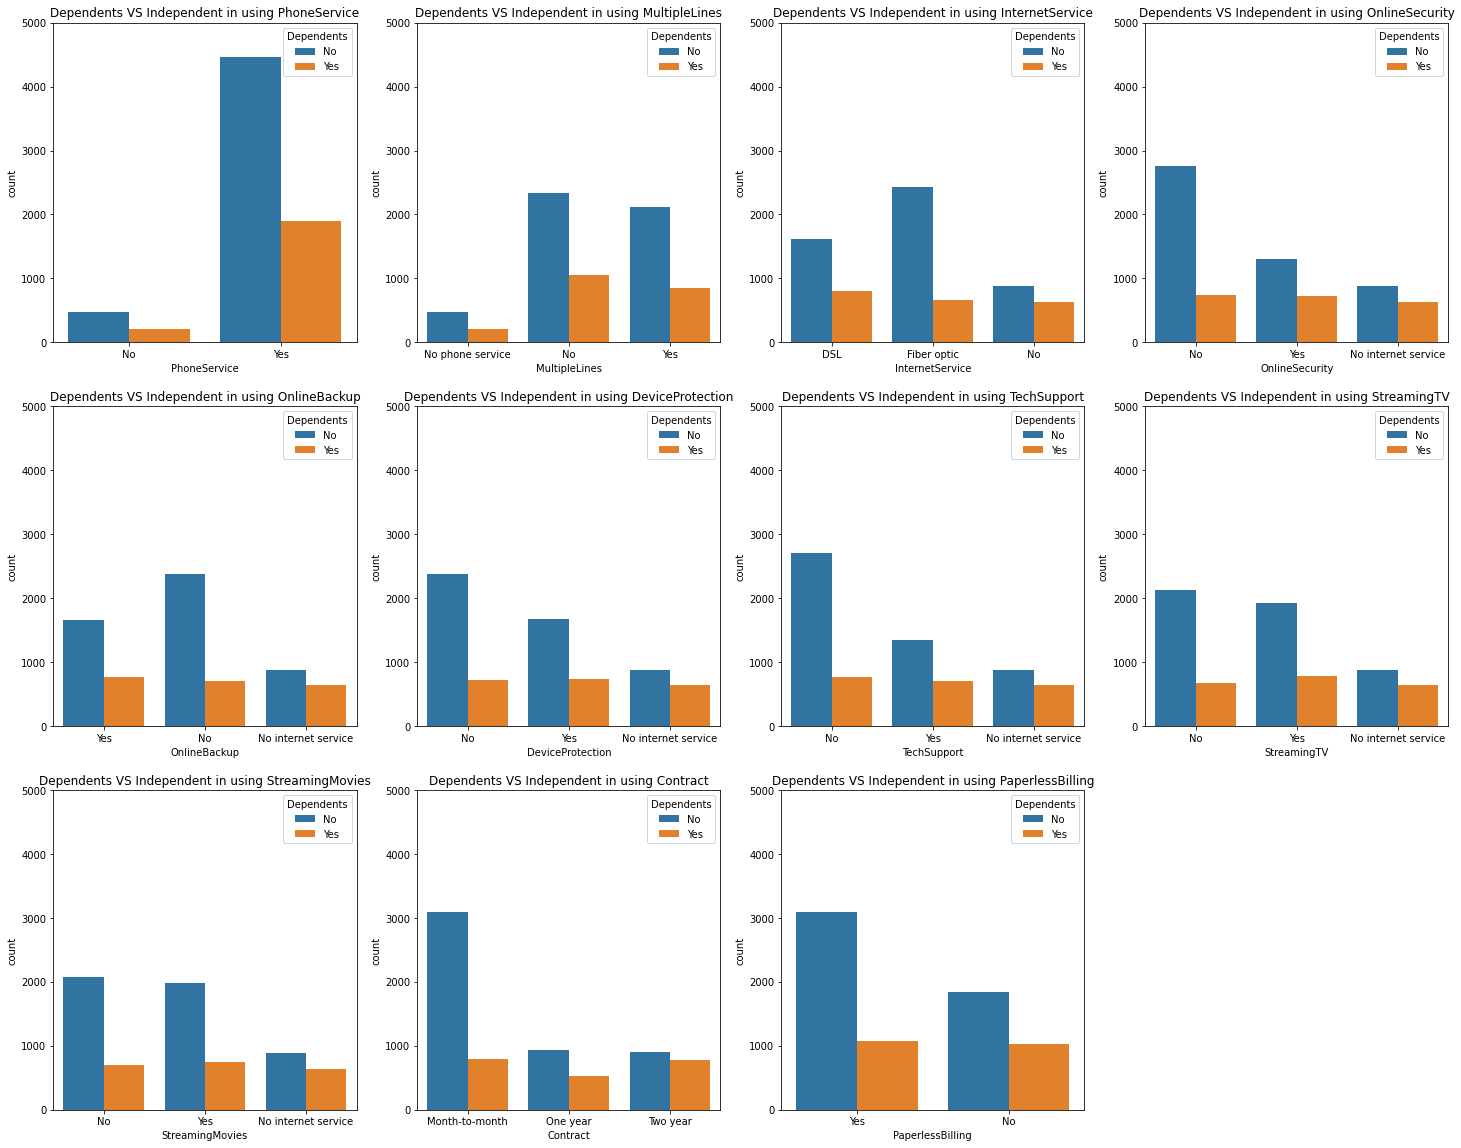

In [65]:
plt.figure(figsize= (25,20))
for i ,feature in enumerate(list(service.columns)):
  plt.subplot(3,4,i+1)
  sns.countplot(feature,hue = telco.Dependents,data = telco)
  plt.ylim(0,5000)
  plt.title('Dependents VS Independent in using {}'.format(feature))
plt.show()

**The previous plot aims to find out the number of dependent people who use different services and the number of independent people who use the same services as well**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

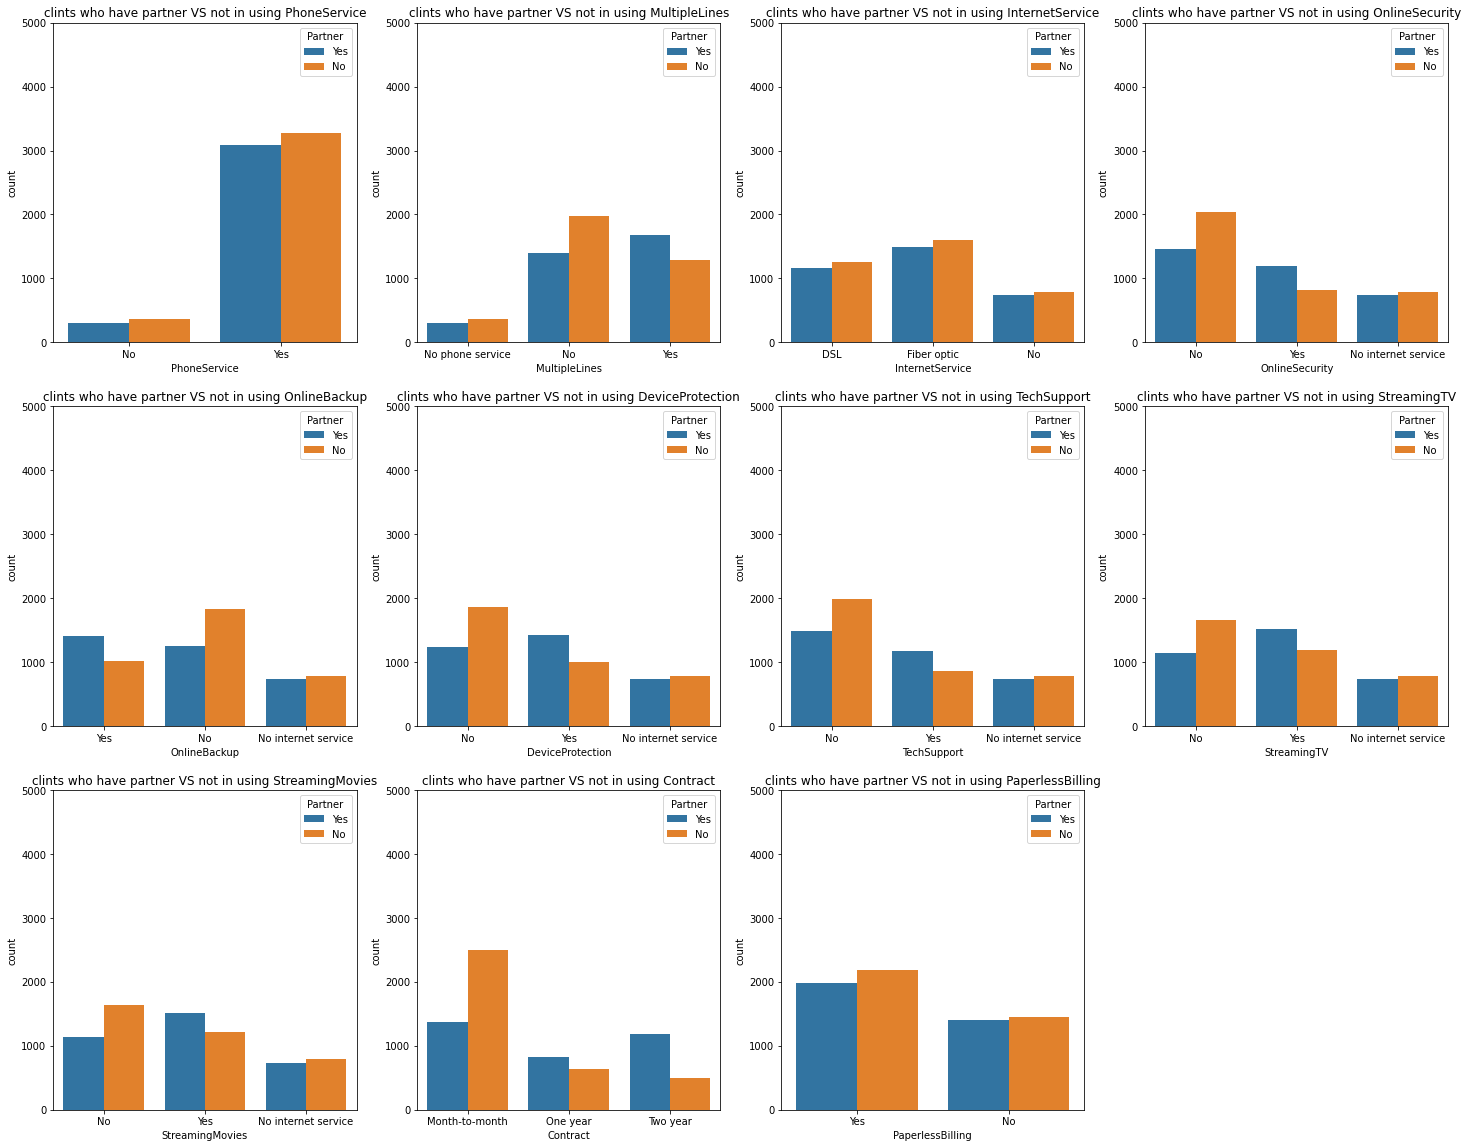

In [66]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.Partner,data=telco)
    plt.ylim(0,5000)
    plt.title('clints who have partner VS not in using {}'.format(feature))
plt.show()

**The previous plot aims to find out the number of clients who has partner use different services and the number of clients who don't have partner use the same services as well**

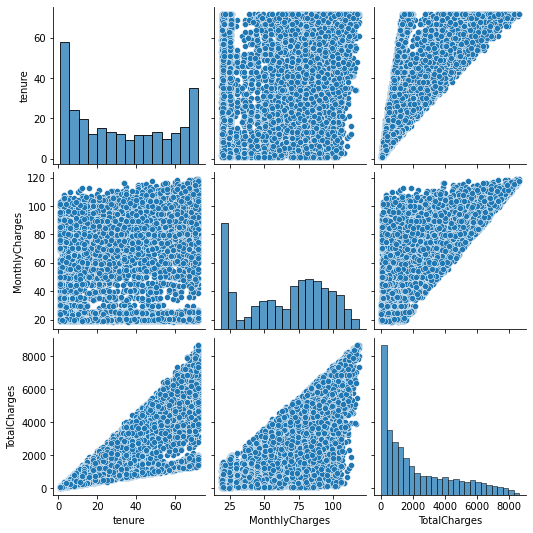

In [67]:
sns.pairplot(num_col)
plt.show()

**Talk about some of the the relatinships you observed in this part of the investigation,How did the feature(s) of interest vary with other features in dataset ?**

- There are a big positive correlation between tenure,Monthly and Total charges 

# Multivariate Exploration 

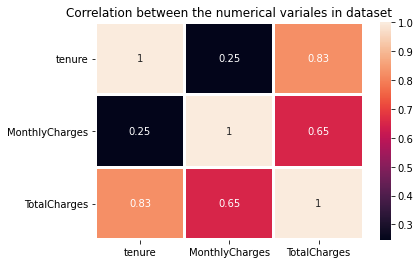

In [68]:
sns.heatmap(num_col.corr(),annot = True,linewidths=2)
plt.title('Correlation between the numerical variales in dataset')
plt.show()

**Now we can see how mush each feature  correlated with the others**

#Conclusions

**In the end there are some problems the company faces:**

- 41.7% of senir citizens left the company.
- 33% of customers who don't have a partner left the company.
- 31% of independent customers left the company.
- 15.4% of dependent customers left thr company.
- 8.7% of customers left the company after the first month.
- 19.3% of customers left the company after first 5 month.
- A large number of customers using Fiber Optic have left the compay.
- Clients who do not use online security, many of them leave the company.
- Many clients wh do not use technical support have lest the company.
- Customers who pay month to month are the most who leave the company. 